In [14]:
import pandas as pd
from sklearn.decomposition import PCA
import os
import utilsCM
import numpy as np
import runCV


# Predicting using random weights

### Determine parameters over which to do cross-validation

In [15]:
# datapath = '../../../data-00/'
# keyword = {'DNNActvtn','ROIpred'}
keyword = {'ROIpred'}
layer =  {'conv_5'}
Sub = [1]
ROI = {'EVC'}
# Keepncomps = list(range(2,42,2))

pretrained_val = True
RandomWs = False
datapath='../../../data-00/'
savepath = '../../../data-12/' #This needs to change based on step number!
# Ypredict = 'Word2Sense' #Word2Vec or Word2Sense

In [16]:

runCV.runCV_execute(pretrained_val,savepath,Ypredict='Word2Sense',datapath=datapath,keyword=keyword,ROI=ROI,Sub=Sub,layer=layer,RandomWs=RandomWs)


EVC (312, 200)


In [17]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

datapath = '../../../data-12/'
figurepath = '../../../figures-12/'

keyword={'ROIpred'}
# pretrained_vec = [True, False]
layer={'conv_5'}

In [18]:
myDict_median,myDict_max,myDict_count,myDict_mean = runCV.buildDict(datapath,figurepath,setbonf = False,Ypredict='Word2Sense',keyword=keyword,ROI = ROI,layer=layer)



In [19]:
len(myDict_count['Metric'])

20

In [20]:
len(myDict_count['ObjectROI'])

KeyError: 'ObjectROI'

In [21]:
len(myDict_count['DNNActvtn'])

KeyError: 'DNNActvtn'

In [22]:
myDict_count.items()

dict_items([('EVC_random', [72, 64, 64, 70, 68, 73, 68, 64, 64, 63, 62, 58, 58, 63, 56, 56, 55, 57, 58, 60]), ('EVC', [106, 111, 113, 110, 114, 115, 116, 118, 116, 119, 119, 120, 117, 115, 116, 117, 117, 116, 118, 117]), ('PCs', [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]), ('Metric', ['count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count', 'count'])])

In [23]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [24]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

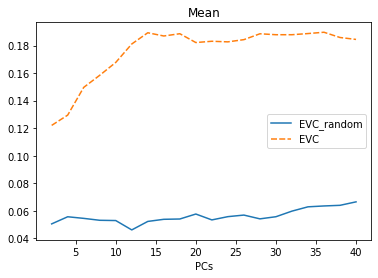

In [25]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:2]).set_title('Mean')
plt.savefig(figurepath + "Mean.png")

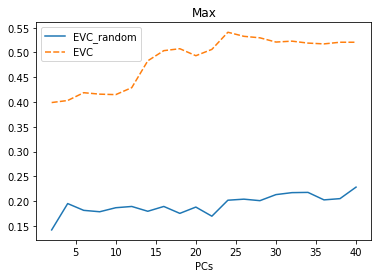

In [26]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:2]).set_title('Max')
plt.savefig(figurepath + "Max.png")

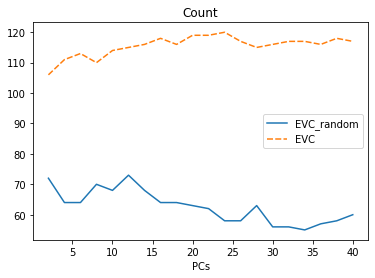

In [27]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:2]).set_title('Count')
plt.savefig(figurepath + "Count.png")

In [ ]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'median'].iloc[:,0:2]).set_title('Median')
plt.savefig(figurepath + "Median.png")